

## **Motivation**:

The overall motivation for this work is to accelerate the discovery of new materials that can solve the global challenge of renewable energy storage, the mechanism relies on predicting the relaxed state (structure and energy).

* * *
## **Dataset information**
Each Data object includes the following information for each corresponding system (assuming K atoms):

* `sid` - [1] System ID corresponding to each structure
* `edge_index` - [2 x  J] Graph connectivity with index 0 corresponding to neighboring atoms and index 1 corresponding to center atoms. J corresponds to the total edges as determined by a nearest neighbor search.
* `atomic_numbers` - [K x 1] Atomic numbers of all atoms in the system
* `pos` - [K x 3] Initial structure positional information of all atoms in the system (x, y, z cartesian coordinates)
* `natoms` - [1] Total number atoms in the system
* `cell` -  [3  x 3] System unit cell (necessary for periodic boundary condition (PBC) calculations)
* `cell_offsets` - [J x 3] offset matrix where each index corresponds to the unit cell offset necessary to find the corresponding neighbor in  `edge_index`. For example,  `cell_offsets[0, :] = [0,1,0]` corresponds to `edge_index[:, 0]= [1,0]` representing node 1 as node 0’s neighbor located one unit cell over in the +y direction.
* `tags` - [K x 1] Atomic tag information: 0 - Fixed, sub-surface atoms, 1 - Free, surface atoms 2 - Free, adsorbate atoms

Train/Val LMDBs additionally contain the following attributes:

* `y_init` - [1] Initial structure energy of the system
* `y_relaxed` - [1] Relaxed structure energy of the system (Energy distribution)
* `pos_relaxed` - [K x 3] Relaxed structure positional information of all atoms in the system (x, y, z cartesian coordinates)


*This LMDB (Lightning Memory-Mapped Database) file requires no additional processing and is ready to be used directly with the repository’s Datasets and DataLoaders.*


* * *
## Libraries & Modules

In [47]:
import importlib
import modules.understand_data
import modules.handle_data
import modules.chemical_eda
import modules.geometric_eda
import modules.data_integrity
import modules.energy_eda
import modules.visual_eda
import modules.visualization3d

importlib.reload(modules.understand_data)
importlib.reload(modules.handle_data)
importlib.reload(modules.chemical_eda)
importlib.reload(modules.geometric_eda)
importlib.reload(modules.data_integrity)
importlib.reload(modules.energy_eda)
importlib.reload(modules.visual_eda)
importlib.reload(modules.visualization3d)

<module 'modules.visualization3d' from '/home/jepazminoc/h2-catalyst-ml/modules/visualization3d.py'>

In [48]:
from modules.understand_data import *
from modules.handle_data import load_df_data
from modules.chemical_eda import perform_chemical_eda
from modules.geometric_eda import perform_geometric_eda
from modules.data_integrity import load_and_validate_dataset
from modules.energy_eda import perform_energy_eda
from modules.visual_eda import *
from modules.visualization3d import *

In [49]:
dataset_path = '../data/is2res_train_val_test_lmdbs/data/is2re/10k/train/data.lmdb'

## Load dataset

In [50]:
data_df = load_df_data(dataset_path, 20)
data_df.head()

Loading data: 100%|██████████| 20/20 [00:00<00:00, 1511.84it/s]


,x,edge_index,edge_attr,pos,norm,face,cell,atomic_numbers,natoms,cell_offsets,force,distances,fixed,sid,tags,y_init,y_relaxed,pos_relaxed
0,None,"[[69, 83, 75, 35, 43, 37, 39, 5, 56, 45, 58, 2...",None,"[[7.0255556, 0.0, 12.73459], [6.9654884, 10.95...",None,None,"[[[11.832515, 0.0, -0.026398], [-3.0482295, 16...","[13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0, 13....",86,"[[0, -1, 0], [0, 0, 0], [0, -1, 0], [0, -1, 0]...","[[0.07672916, 0.03236759, 0.5780765], [0.03831...","[2.811749, 2.811749, 2.811749, 2.8439174, 2.84...","[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",2472718,"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, ...",6.282501,-0.025550,"[[7.0255556, 0.0, 12.73459], [6.872939, 10.890..."
1,None,"[[55, 63, 52, 48, 38, 33, 34, 15, 7, 4, 8, 3, ...",None,"[[5.3127055, 11.384256, 12.790607], [5.3127055...",None,None,"[[[12.750493, 0.0, 0.0], [3.1876233, 13.427562...","[40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40....",85,"[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...","[[-0.4060113, -0.16628616, -0.05275416], [-0.2...","[2.1678982, 2.1678982, 2.1678982, 2.198441, 2....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",1747243,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ...",5.972082,-1.837069,"[[5.3127055, 11.384256, 12.790607], [5.3127055..."
2,None,"[[43, 88, 48, 59, 89, 38, 42, 35, 1, 20, 84, 3...",None,"[[0.47911805, 9.925274, 17.310055], [3.051076,...",None,None,"[[[14.120776, 0.0, -0.0], [-0.0, 20.132154, -1...","[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19....",114,"[[0, 0, 0], [-1, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0.10013931, -0.03330279, 0.13222352], [0.040...","[3.5385437, 3.5449479, 3.6219482, 3.6975377, 3...","[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...",1372820,"[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.497210,-0.423333,"[[0.6374, 9.757039, 17.570086], [3.051076, 10...."
3,None,"[[33, 60, 37, 40, 57, 52, 46, 9, 24, 30, 6, 4,...",None,"[[5.9132943, 5.589967, 15.358818], [2.5504537,...",None,None,"[[[13.451364, 0.0, -0.0], [-0.0, 8.205255, -0....","[44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44....",67,"[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...","[[0.10401902, -0.12071106, 0.28067988], [-0.22...","[2.4056926, 2.4337132, 2.4337134, 2.4337134, 2...","[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",504664,"[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, ...",9.608648,2.931869,"[[5.9132943, 5.589967, 15.358818], [2.5504537,..."
4,None,"[[38, 50, 36, 49, 43, 44, 55, 39, 7, 19, 5, 17...",None,"[[3.8807034, 2.665027, 15.419543], [0.0, 0.0, ...",None,None,"[[[11.642111, 0.0, -0.0], [3.8807034, 7.995081...","[23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23....",76,"[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...","[[0.01171777, 0.02433683, -0.2262483], [0.0031...","[2.6693335, 2.6693335, 2.6693335, 2.6693335, 2...","[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",592368,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",6.556396,-1.105795,"[[3.8807034, 2.665027, 15.419543], [0.0, 0.0, ..."


In [51]:
data_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x               0 non-null      object 
 1   edge_index      20 non-null     object 
 2   edge_attr       0 non-null      object 
 3   pos             20 non-null     object 
 4   norm            0 non-null      object 
 5   face            0 non-null      object 
 6   cell            20 non-null     object 
 7   atomic_numbers  20 non-null     object 
 8   natoms          20 non-null     int64  
 9   cell_offsets    20 non-null     object 
 10  force           20 non-null     object 
 11  distances       20 non-null     object 
 12  fixed           20 non-null     object 
 13  sid             20 non-null     int64  
 14  tags            20 non-null     object 
 15  y_init          20 non-null     float64
 16  y_relaxed       20 non-null     float64
 17  pos_relaxed     20 non-null     object 
dtypes: 

In [52]:
pt_tensor = load_and_validate_dataset(dataset_path)

Phase 1: Loading & Fixing Tensors: 100%|██████████| 10000/10000 [00:06<00:00, 1528.65it/s]


Successfully loaded 10000 validated samples.


In [53]:
pt_tensor[0].keys()

['cell_offsets',
 'cell',
 'tags',
 'pos_relaxed',
 'distances',
 'natoms',
 'pos',
 'atomic_numbers',
 'y_relaxed',
 'force',
 'sid',
 'fixed',
 'y_init',
 'edge_index']

* * *
## Understand Data

I need to know what I have in each row. I know that there are vectors, but I need a visual representation to have a better idea.
So what I'm doing is creating a visual representation of two samples. 

### CPK color scheme:

- Red = Oxygen
- White = Hydrogen
- Grey = Carbon
- Blue = Nitrogen
- Orange/Brown = Copper, etc. (Metals have their own specific colors).

--- Comparing Samples 500 and 250 ---
Attribute                 | Sample 500                     | Sample 250                    
------------------------------------------------------------------------------------------
Formula                   | HHf18N2P2Re8                   | H2Mn32Ni32OSi32               
Energy (eV)               | -1.9667                        | -0.3474                       
Total Atoms               | 31                             | 99                            
Adsorbate Atoms           | 17                             | 72                            




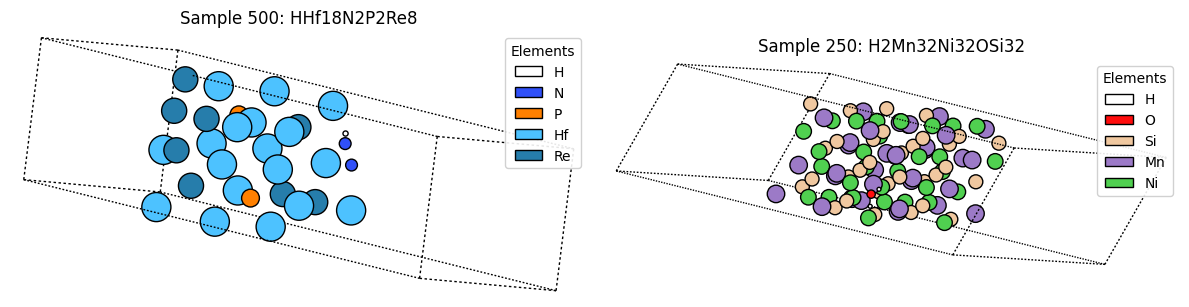

In [54]:
compare_samples(dataset_path, 500, 250)

* * *
## **EDA**

### **1.- Chemical & Distribution Analysis**

Here is where I understand what I'm going to simulate, basically there are three aspects:

* *Distribution of system sizes:* It represent how complex a graph/system (catalyst + adsorbate pairs) is. This tells me how much of the system is actually "moving" during the simulated relaxation.
* *Elemental Diversity:* Visualize the frequency of metals in the catalysts versus elements in the adsorbates (H, C, N, O).
* *Chemical diversity:* Active elements in the reaction. In the end the model needs to learn how these specific small molecules interact with the much larger metal surface.
* *Tag distribution:* Calculate the ratio of Fixed (0) [These are sub-surface atoms] vs. Free (1, 2) atoms. This tells me how much of the system is actually "moving" during the simulated relaxation.


**Summary:** In this phase, I need to verify the diversity of the catalysts and adsorbates to understand the domain of the model. I take a look at the Atomic Number distributions, map them to chemical symbols, and analyze the Tag system (Adsorbate vs. Surface vs. Subsurface).

Analyzing 10000 systems...


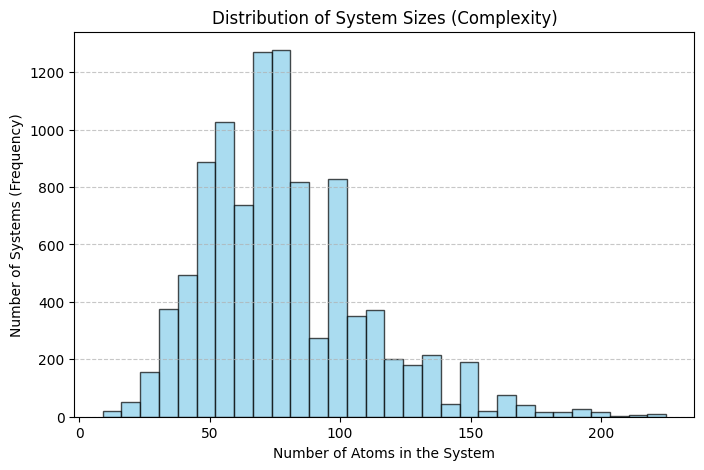

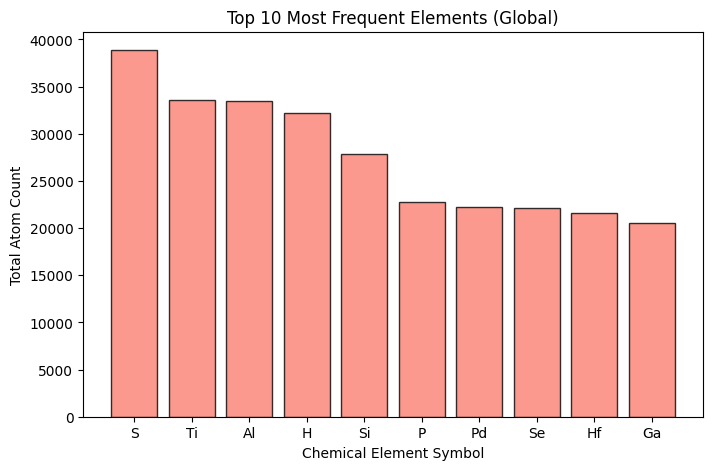

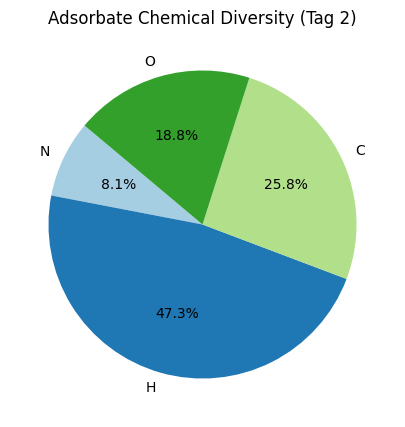

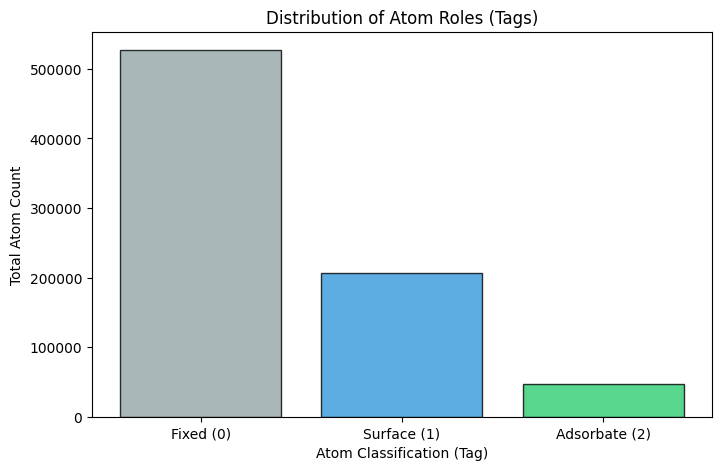


--- Summary ---
Elements Discovered: ['Ag', 'Al', 'As', 'Au', 'B', 'Bi', 'C', 'Ca', 'Cd', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Fe', 'Ga', 'Ge', 'H', 'Hf', 'Hg', 'In', 'Ir', 'K', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Ni', 'O', 'Os', 'P', 'Pb', 'Pd', 'Pt', 'Rb', 'Re', 'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si', 'Sn', 'Sr', 'Ta', 'Tc', 'Te', 'Ti', 'Tl', 'V', 'W', 'Y', 'Zn', 'Zr']
Vertical Axis Meaning:
 - System Sizes: Count of distinct catalyst+adsorbate systems.
 - Global Frequency: Absolute sum of atoms across all loaded systems.
 - Tag Distribution: Population of atoms categorized by their mobility (Fixed vs Free).


In [55]:
perform_chemical_eda(pt_tensor)

* * *
### **2.- Geometric & Graph Topology**

Since models like SchNet rely on distances and angles, I have to analyze the spatial relationships.
It provides a phisical idea of the atomic environment.

Calculating Geometric Properties for 10000 systems...


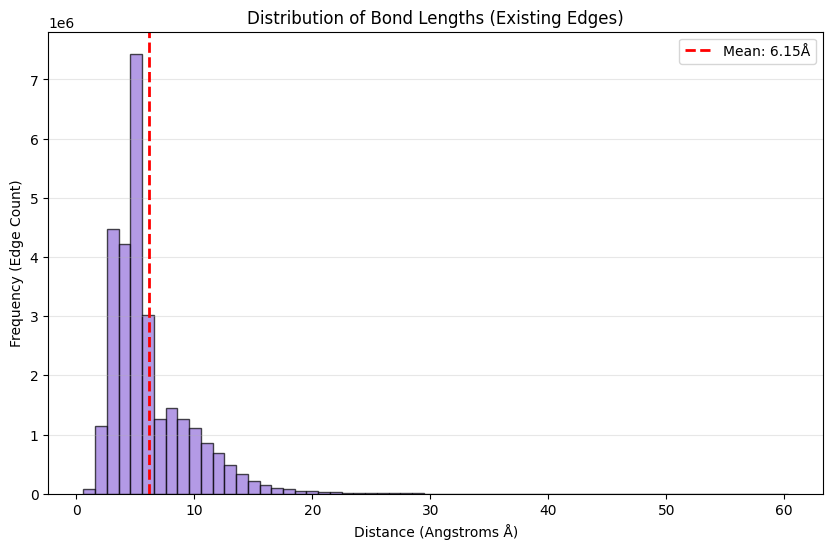

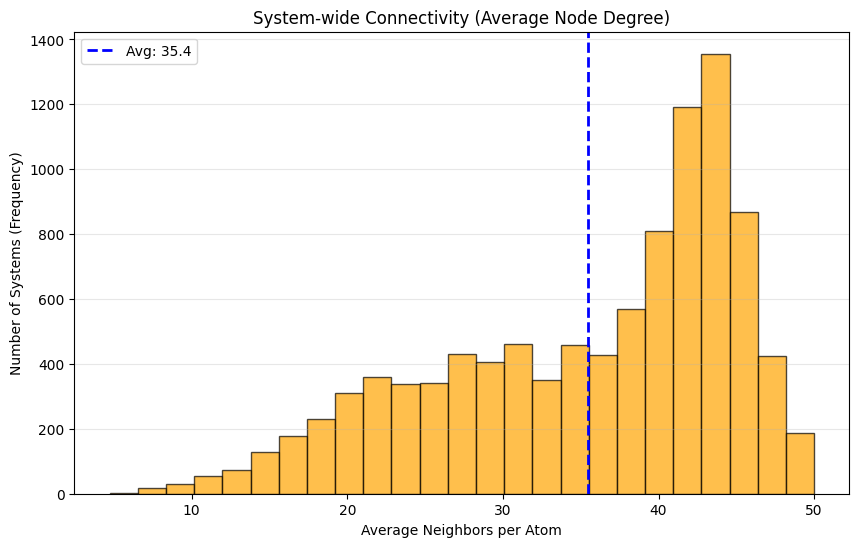


--- Geometric Summary ---
Total Edges Analyzed: 28613395
Global Mean Bond Length: 6.15 Å
Shortest Detected Bond: 0.60 Å
Longest Detected Bond: 60.32 Å
Global Average Neighbors: 35.45 per atom

---> Insights for Model Configuration ---
1. Cutoff Suggestion: Your longest edge is 60.32Å.
2. Graph Density: On average, each atom is connected to 35.4 others.
   High connectivity increases the number of message-passing operations.


In [56]:
perform_geometric_eda(pt_tensor)

### *Understand results*
They describe how the atoms are spaced and how dense the communication network is within each chemical system.
- *Graphic 1:* This chart tells me the physical distance between every pair of atoms that has an "edge" (a connection). The Vertical Axis is the *Edge Count*. It shows how many atom pairs in my dataset are separated by a specific distance.

- *Graphic 2:* This chart tells me how "crowded" or "dense" my graphs are. It measures the number of neighbors each atom has. The vertical axis tells me how many distict chemical structures have that average connectivity.


### *Summary*
**Computationally Expensive:** Because the average connectivity is 35.4, every time there is a "message passing" layer in mi model, each atom has to aggregate information from ~35 other nodes. This makes OCP models much more memory intensive.

**Cutoff Sensitivity:** If I build a model and set the cutoff radius to 5.0Å, I will delete the majority of the connections shown in the first plot (since the mean is 6.15Å). This may lead to poor energy predictions because the model would be "blind" to long-range interactions that are present in the data.

* * *
## 3.- Energy & Target Analysis

This analysis explores the relationship between the initial energy `y_init`, the target relaxed energy `y_relaxed`, and the resulting energy (`y_relaxed - y_init`). Understanding the distribution and scale of these values will help to decide which normalization strategies and evaluate the difficulty of my model will solve.

Extracting energy data from 10000 systems...


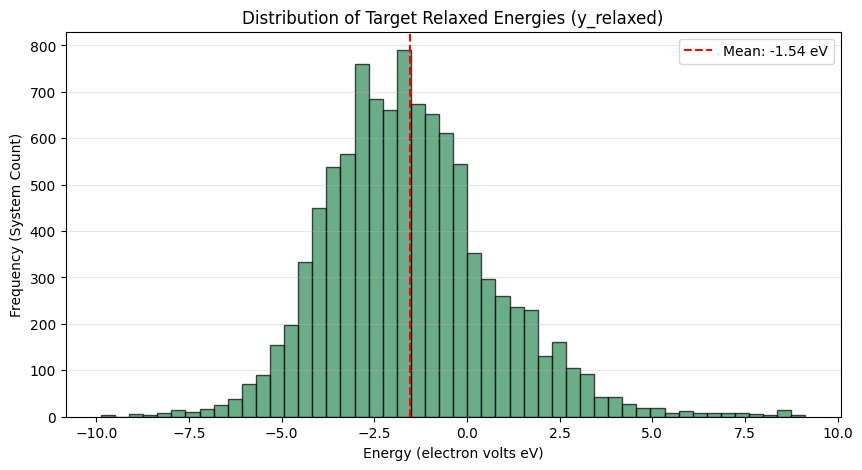

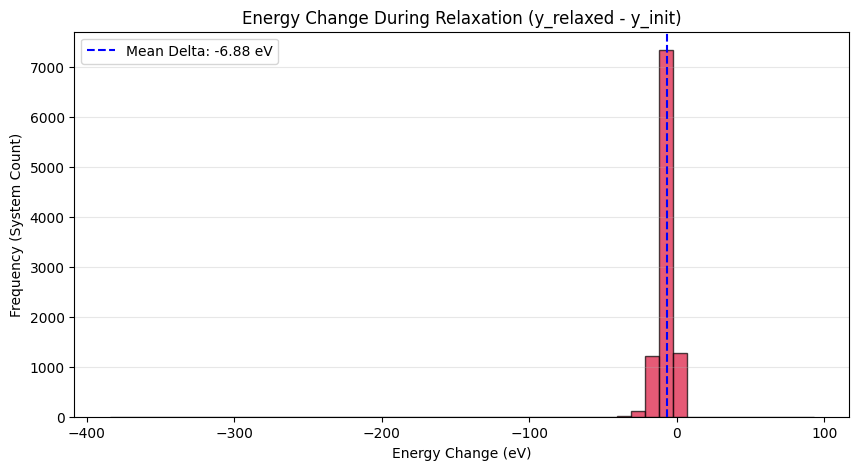

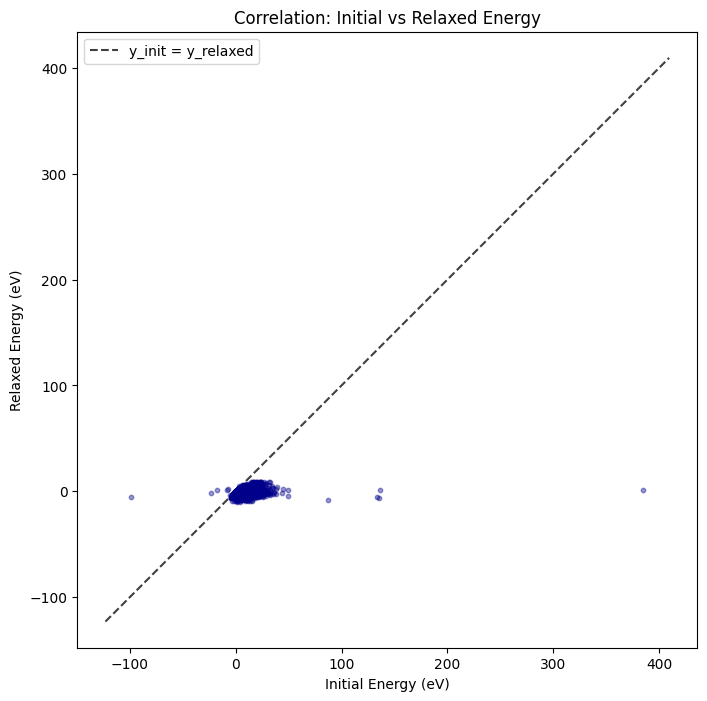


--- Energy EDA Summary ---
Total valid samples: 10000
Relaxed Energy Range: [-9.88, 9.13] eV
Avg Relaxation 'Drop': -6.8755 eV
Std Dev of Targets: 2.2782 eV


In [57]:
perform_energy_eda(pt_tensor)

### *Understand results*
- Graph 01 (`y_relaxed`): Most chemical systems are between -5 and 2 eV. If my model starts predicting values like -50 or +50, I know something is wrong.
- Graph 02 (`y_relaxed - y_init`): This is physically correct, chemical systems should lose energy to reach a relaxed state.
- Graph 03 (`Corelation`): Most of the blue dots are under `y_init=x_relaxed` line, that confirms the energy drop. Blue dots that are to far from cero can be consider ourliers.

### *Summary:*
- Relaxed Energy Range [-9.88, 9.13] eV: This tells me the diversity of my targets. The range goes from nearly 20 eV, It means my model should be sensitive to both highly stable (negative energy) and less stable (positive energy) configurations.

- Avg Relaxation 'Drop' (-6.88 eV): On average, the system's energy decreases by nearly 7 eV during the relaxation process. In physics, a lower energy state is a more stable state. This indicates that the "initial structures" in the dataset are often quite far from their equilibrium, and the model must learn the complex chemical relationship that leads to this stabilization.

- Std Dev of Targets (2.28 eV): This measures the "spread" of the data. The model needs to understand the specific catalyst-adsorbate interaction to make accurate predictions.

*The fact that the `Initial vs Relaxed energy` graph doesn't follow a simple linear trend means the relationship is non-linear and complex, so here is where I can use a Graph Neural Networks (GNNs).*



* * *
## 4.- Visual Inspection


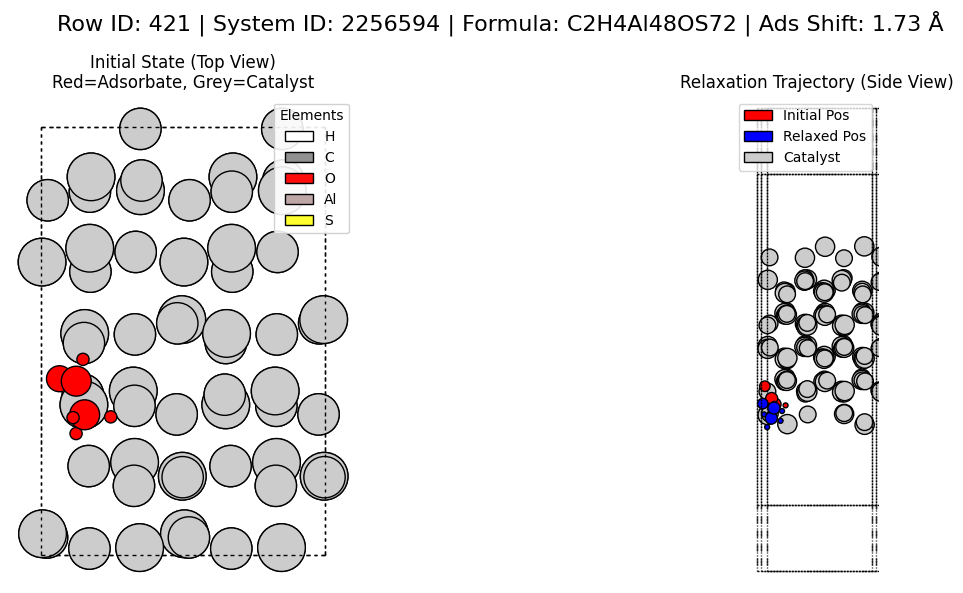

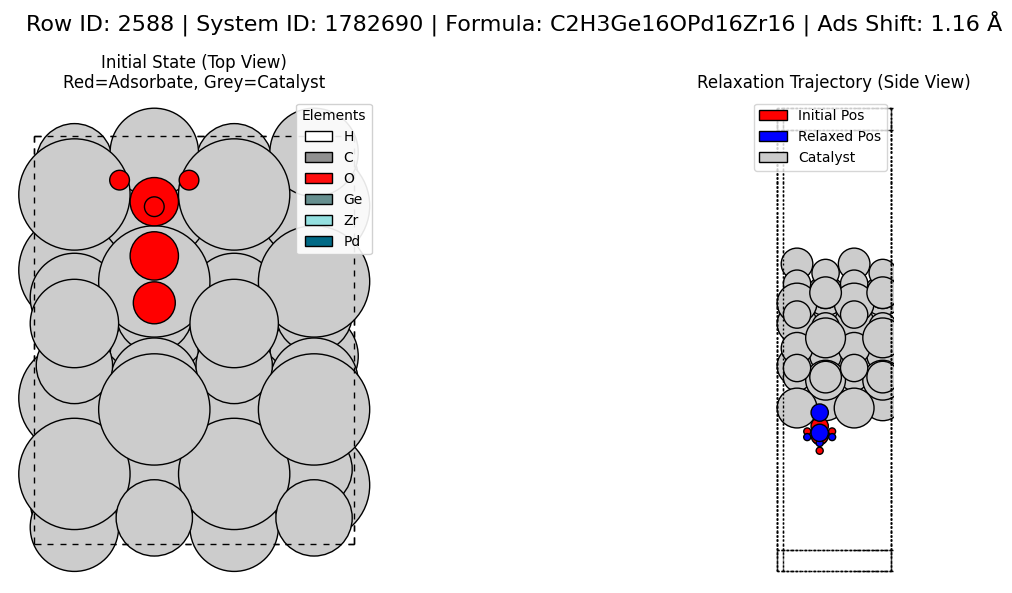

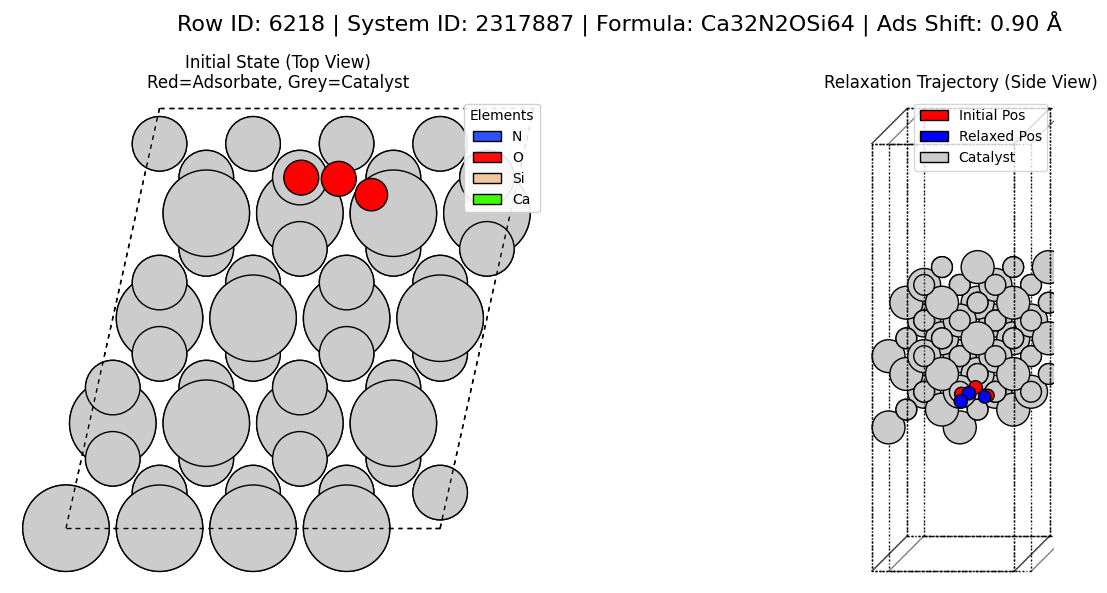

In [58]:
visualize_and_compare_relaxations(pt_tensor, 3)

In [59]:
visualize_interactive_relaxation(pt_tensor, 6544)

Interactive View for Sample 6544
Grey=Catalyst | Red(Transparent)=Initial Adsorbate | Blue=Relaxed Adsorbate | Yellow Line=Movement


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

***
## **Load *Train* and *Validation* Datasets**

In [60]:
train_dataset_path = '../data/is2res_train_val_test_lmdbs/data/is2re/100k/train/data.lmdb'
val_dataset_path = '../data/is2res_train_val_test_lmdbs/data/is2re/all/val_id/data.lmdb'

train = load_and_validate_dataset(train_dataset_path, 32000)
validation = load_and_validate_dataset(val_dataset_path, 8000)

Phase 1: Loading & Fixing Tensors: 100%|██████████| 32000/32000 [00:20<00:00, 1597.87it/s]


Successfully loaded 32000 validated samples.


Phase 1: Loading & Fixing Tensors: 100%|██████████| 8000/8000 [00:07<00:00, 1027.09it/s]

Successfully loaded 8000 validated samples.


In [61]:
train_8k = load_and_validate_dataset(train_dataset_path, 8000)
validation_2k = load_and_validate_dataset(val_dataset_path, 2000)

Phase 1: Loading & Fixing Tensors: 100%|██████████| 8000/8000 [00:07<00:00, 1032.89it/s]


Successfully loaded 8000 validated samples.


Phase 1: Loading & Fixing Tensors: 100%|██████████| 2000/2000 [00:01<00:00, 1063.67it/s]

Successfully loaded 2000 validated samples.


***
## **SchNet GNN - Train (T32 & V8)**
### Training with 32k samples and validate with 8k samples

In [62]:
import modules.SchNet_gnn
importlib.reload(modules.SchNet_gnn)
from modules.SchNet_gnn import *

In [63]:
model, train_maes, val_maes, val_loader, device, preds, targets = configure_and_run_training(train, validation, epochs=35, batch_size=128)

Starting Training on: cuda


Training Epoch:   0%|          | 0/250 [00:00<?, ?it/s]

Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.42it/s]


Epoch 01 | Train MAE: 1.2651 eV | Val MAE: 1.1407 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 23.95it/s]


Epoch 02 | Train MAE: 1.1349 eV | Val MAE: 1.1530 eV


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.40it/s]


Epoch 03 | Train MAE: 1.0820 eV | Val MAE: 1.0701 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.82it/s]


Epoch 04 | Train MAE: 1.0503 eV | Val MAE: 1.0545 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 25.03it/s]


Epoch 05 | Train MAE: 1.0289 eV | Val MAE: 1.0427 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 25.02it/s]


Epoch 06 | Train MAE: 1.0070 eV | Val MAE: 1.0356 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.31it/s]


Epoch 07 | Train MAE: 0.9960 eV | Val MAE: 1.0108 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 23.95it/s]


Epoch 08 | Train MAE: 0.9747 eV | Val MAE: 1.0167 eV


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.93it/s]


Epoch 09 | Train MAE: 0.9591 eV | Val MAE: 0.9970 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.99it/s]


Epoch 10 | Train MAE: 0.9439 eV | Val MAE: 0.9844 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 25.01it/s]


Epoch 11 | Train MAE: 0.9305 eV | Val MAE: 0.9735 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.83it/s]


Epoch 12 | Train MAE: 0.9153 eV | Val MAE: 0.9811 eV


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.82it/s]


Epoch 13 | Train MAE: 0.9004 eV | Val MAE: 0.9729 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.31it/s]


Epoch 14 | Train MAE: 0.8736 eV | Val MAE: 0.9742 eV


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.76it/s]


Epoch 15 | Train MAE: 0.8592 eV | Val MAE: 0.9640 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.89it/s]


Epoch 16 | Train MAE: 0.8415 eV | Val MAE: 0.9557 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.93it/s]


Epoch 17 | Train MAE: 0.8225 eV | Val MAE: 0.9800 eV


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.96it/s]


Epoch 18 | Train MAE: 0.8108 eV | Val MAE: 0.9700 eV


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.29it/s]


Epoch 19 | Train MAE: 0.7912 eV | Val MAE: 0.9449 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.12it/s]


Epoch 20 | Train MAE: 0.7732 eV | Val MAE: 0.9662 eV


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.80it/s]


Epoch 21 | Train MAE: 0.7598 eV | Val MAE: 0.9763 eV


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 25.09it/s]


Epoch 22 | Train MAE: 0.7392 eV | Val MAE: 0.9650 eV


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 25.09it/s]


Epoch 23 | Train MAE: 0.6694 eV | Val MAE: 0.9447 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.62it/s]


Epoch 24 | Train MAE: 0.6287 eV | Val MAE: 0.9498 eV


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.04it/s]


Epoch 25 | Train MAE: 0.6051 eV | Val MAE: 0.9678 eV


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.69it/s]


Epoch 26 | Train MAE: 0.5864 eV | Val MAE: 0.9542 eV


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.90it/s]


Epoch 27 | Train MAE: 0.5297 eV | Val MAE: 0.9575 eV


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.53it/s]


Epoch 28 | Train MAE: 0.4954 eV | Val MAE: 0.9528 eV


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.52it/s]


Epoch 29 | Train MAE: 0.4770 eV | Val MAE: 0.9650 eV


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.16it/s]


Epoch 30 | Train MAE: 0.4393 eV | Val MAE: 0.9652 eV


Training Epoch: 100%|██████████| 250/250 [00:11<00:00, 21.81it/s]


Epoch 31 | Train MAE: 0.4169 eV | Val MAE: 0.9657 eV


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.56it/s]


Epoch 32 | Train MAE: 0.4036 eV | Val MAE: 0.9715 eV


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.88it/s]


Epoch 33 | Train MAE: 0.3807 eV | Val MAE: 0.9698 eV


Training Epoch: 100%|██████████| 250/250 [00:09<00:00, 25.06it/s]


Epoch 34 | Train MAE: 0.3682 eV | Val MAE: 0.9740 eV


Training Epoch: 100%|██████████| 250/250 [00:10<00:00, 24.77it/s]


Epoch 35 | Train MAE: 0.3598 eV | Val MAE: 0.9765 eV


## **SchNet GNN - Train (T8 & V2)**
### Training with 8k samples and validate with 2k samples

In [64]:
model_8k, train_maes_8k, val_maes_8k, val_loader_8k, device_8k, preds_8k, targets_8k = configure_and_run_training(train_8k, validation_2k, epochs=35, batch_size=128)

Starting Training on: cuda


Training Epoch:   0%|          | 0/63 [00:00<?, ?it/s]

Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 22.45it/s]


Epoch 01 | Train MAE: 1.4421 eV | Val MAE: 1.2552 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.15it/s]


Epoch 02 | Train MAE: 1.2037 eV | Val MAE: 1.1777 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.28it/s]


Epoch 03 | Train MAE: 1.1453 eV | Val MAE: 1.1604 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.18it/s]


Epoch 04 | Train MAE: 1.1192 eV | Val MAE: 1.1570 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.19it/s]


Epoch 05 | Train MAE: 1.0907 eV | Val MAE: 1.1239 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.27it/s]


Epoch 06 | Train MAE: 1.0758 eV | Val MAE: 1.1168 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.22it/s]


Epoch 07 | Train MAE: 1.0483 eV | Val MAE: 1.1142 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.40it/s]


Epoch 08 | Train MAE: 1.0266 eV | Val MAE: 1.1044 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.20it/s]


Epoch 09 | Train MAE: 1.0099 eV | Val MAE: 1.1142 eV


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.32it/s]


Epoch 10 | Train MAE: 0.9902 eV | Val MAE: 1.0902 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 23.87it/s]


Epoch 11 | Train MAE: 0.9786 eV | Val MAE: 1.0917 eV


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 23.82it/s]


Epoch 12 | Train MAE: 0.9506 eV | Val MAE: 1.0824 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.03it/s]


Epoch 13 | Train MAE: 0.9422 eV | Val MAE: 1.0915 eV


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.22it/s]


Epoch 14 | Train MAE: 0.9285 eV | Val MAE: 1.1014 eV


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.49it/s]


Epoch 15 | Train MAE: 0.9114 eV | Val MAE: 1.1064 eV


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.54it/s]


Epoch 16 | Train MAE: 0.8622 eV | Val MAE: 1.0906 eV


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.61it/s]


Epoch 17 | Train MAE: 0.8310 eV | Val MAE: 1.0679 eV
Checkpoint saved.


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.35it/s]


Epoch 18 | Train MAE: 0.8131 eV | Val MAE: 1.0774 eV


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.29it/s]


Epoch 19 | Train MAE: 0.7990 eV | Val MAE: 1.0855 eV


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.42it/s]


Epoch 20 | Train MAE: 0.7897 eV | Val MAE: 1.1221 eV


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.38it/s]


Epoch 21 | Train MAE: 0.7445 eV | Val MAE: 1.1022 eV


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.28it/s]


Epoch 22 | Train MAE: 0.7174 eV | Val MAE: 1.0958 eV


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.30it/s]


Epoch 23 | Train MAE: 0.7051 eV | Val MAE: 1.0960 eV


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.21it/s]


Epoch 24 | Train MAE: 0.6786 eV | Val MAE: 1.1020 eV


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.24it/s]


Epoch 25 | Train MAE: 0.6638 eV | Val MAE: 1.1127 eV


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.38it/s]


Epoch 26 | Train MAE: 0.6538 eV | Val MAE: 1.1113 eV


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.47it/s]


Epoch 27 | Train MAE: 0.6357 eV | Val MAE: 1.1097 eV


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.48it/s]


Epoch 28 | Train MAE: 0.6268 eV | Val MAE: 1.1119 eV


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.44it/s]


Epoch 29 | Train MAE: 0.6210 eV | Val MAE: 1.1137 eV


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.47it/s]


Epoch 30 | Train MAE: 0.6102 eV | Val MAE: 1.1148 eV


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.33it/s]


Epoch 31 | Train MAE: 0.6063 eV | Val MAE: 1.1172 eV


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.27it/s]


Epoch 32 | Train MAE: 0.6032 eV | Val MAE: 1.1187 eV


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.07it/s]


Epoch 33 | Train MAE: 0.5975 eV | Val MAE: 1.1177 eV


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 23.98it/s]


Epoch 34 | Train MAE: 0.5951 eV | Val MAE: 1.1183 eV


Training Epoch: 100%|██████████| 63/63 [00:02<00:00, 24.12it/s]


Epoch 35 | Train MAE: 0.5936 eV | Val MAE: 1.1193 eV


***
## **PaiNN GNN - Train (T32 & V8)**
### Training with 32k samples and validate with 8k samples

In [65]:
import modules.PaiNN_gnn
importlib.reload(modules.PaiNN_gnn)
from modules.PaiNN_gnn import *

In [66]:
p_model, p_train_maes, p_val_maes, p_val_loader, p_device, p_preds, p_targets = configure_and_run_painn_training(train, validation, epochs=20, batch_size=32, lr=0.0005)

Initializing PaiNN on cuda...


PaiNN Training: 100%|██████████| 1000/1000 [00:15<00:00, 62.83it/s]


Epoch 1 | Train MAE: 1.2751 | Val MAE: 1.1488


PaiNN Training: 100%|██████████| 1000/1000 [00:15<00:00, 64.01it/s]


Epoch 2 | Train MAE: 1.0409 | Val MAE: 0.9866


PaiNN Training: 100%|██████████| 1000/1000 [00:15<00:00, 65.19it/s]


Epoch 3 | Train MAE: 0.9490 | Val MAE: 0.9352


PaiNN Training: 100%|██████████| 1000/1000 [00:15<00:00, 65.35it/s]


Epoch 4 | Train MAE: 0.9031 | Val MAE: 0.9024


PaiNN Training: 100%|██████████| 1000/1000 [00:15<00:00, 65.26it/s]


Epoch 5 | Train MAE: 0.8622 | Val MAE: 0.9291


PaiNN Training: 100%|██████████| 1000/1000 [00:15<00:00, 63.74it/s]


Epoch 6 | Train MAE: 0.8316 | Val MAE: 0.8852


PaiNN Training: 100%|██████████| 1000/1000 [00:15<00:00, 65.34it/s]


Epoch 7 | Train MAE: 0.7914 | Val MAE: 0.8731


PaiNN Training: 100%|██████████| 1000/1000 [00:15<00:00, 65.36it/s]


Epoch 8 | Train MAE: 0.7631 | Val MAE: 0.9204


PaiNN Training: 100%|██████████| 1000/1000 [00:15<00:00, 65.05it/s]


Epoch 9 | Train MAE: 0.7326 | Val MAE: 0.8725


PaiNN Training: 100%|██████████| 1000/1000 [00:15<00:00, 63.69it/s]


Epoch 10 | Train MAE: 0.7038 | Val MAE: 0.8434


PaiNN Training: 100%|██████████| 1000/1000 [00:15<00:00, 64.94it/s]


Epoch 11 | Train MAE: 0.6734 | Val MAE: 0.8645


PaiNN Training: 100%|██████████| 1000/1000 [00:15<00:00, 65.29it/s]


Epoch 12 | Train MAE: 0.6548 | Val MAE: 0.8633


PaiNN Training: 100%|██████████| 1000/1000 [00:15<00:00, 64.61it/s]


Epoch 13 | Train MAE: 0.6286 | Val MAE: 0.8582


PaiNN Training: 100%|██████████| 1000/1000 [00:15<00:00, 64.56it/s]


Epoch 14 | Train MAE: 0.5436 | Val MAE: 0.8545


PaiNN Training: 100%|██████████| 1000/1000 [00:15<00:00, 63.52it/s]


Epoch 15 | Train MAE: 0.4947 | Val MAE: 0.8507


PaiNN Training: 100%|██████████| 1000/1000 [00:15<00:00, 64.86it/s]


Epoch 16 | Train MAE: 0.4648 | Val MAE: 0.8454


PaiNN Training: 100%|██████████| 1000/1000 [00:15<00:00, 65.26it/s]


Epoch 17 | Train MAE: 0.4102 | Val MAE: 0.8510


PaiNN Training: 100%|██████████| 1000/1000 [00:15<00:00, 64.56it/s]


Epoch 18 | Train MAE: 0.3701 | Val MAE: 0.8499


PaiNN Training: 100%|██████████| 1000/1000 [00:15<00:00, 64.30it/s]


Epoch 19 | Train MAE: 0.3471 | Val MAE: 0.8558


PaiNN Training: 100%|██████████| 1000/1000 [00:15<00:00, 65.46it/s]


Epoch 20 | Train MAE: 0.3112 | Val MAE: 0.8558


## **PaiNN GNN - Train (T8 & V2)**
### Training with 8k samples and validate with 2k samples

In [67]:
p_model_8k, p_train_maes_8k, p_val_maes_8k, p_val_loader_8k, p_device_8k, p_preds_8k, p_targets_8k = configure_and_run_painn_training(train_8k, validation_2k, epochs=20, batch_size=32, lr=0.0005)

Initializing PaiNN on cuda...


PaiNN Training: 100%|██████████| 250/250 [00:03<00:00, 63.11it/s]


Epoch 1 | Train MAE: 1.5095 | Val MAE: 1.2693


PaiNN Training: 100%|██████████| 250/250 [00:03<00:00, 65.74it/s]


Epoch 2 | Train MAE: 1.2401 | Val MAE: 1.2177


PaiNN Training: 100%|██████████| 250/250 [00:03<00:00, 65.57it/s]


Epoch 3 | Train MAE: 1.1505 | Val MAE: 1.0985


PaiNN Training: 100%|██████████| 250/250 [00:03<00:00, 65.71it/s]


Epoch 4 | Train MAE: 1.0729 | Val MAE: 1.0817


PaiNN Training: 100%|██████████| 250/250 [00:03<00:00, 65.55it/s]


Epoch 5 | Train MAE: 1.0255 | Val MAE: 1.0453


PaiNN Training: 100%|██████████| 250/250 [00:03<00:00, 65.49it/s]


Epoch 6 | Train MAE: 0.9927 | Val MAE: 1.0195


PaiNN Training: 100%|██████████| 250/250 [00:03<00:00, 65.54it/s]


Epoch 7 | Train MAE: 0.9563 | Val MAE: 1.0122


PaiNN Training: 100%|██████████| 250/250 [00:03<00:00, 65.26it/s]


Epoch 8 | Train MAE: 0.8951 | Val MAE: 1.0285


PaiNN Training: 100%|██████████| 250/250 [00:03<00:00, 65.55it/s]


Epoch 9 | Train MAE: 0.8499 | Val MAE: 1.0175


PaiNN Training: 100%|██████████| 250/250 [00:03<00:00, 65.82it/s]


Epoch 10 | Train MAE: 0.8109 | Val MAE: 1.0260


PaiNN Training: 100%|██████████| 250/250 [00:03<00:00, 66.05it/s]


Epoch 11 | Train MAE: 0.7151 | Val MAE: 0.9858


PaiNN Training: 100%|██████████| 250/250 [00:03<00:00, 66.01it/s]


Epoch 12 | Train MAE: 0.6481 | Val MAE: 0.9897


PaiNN Training: 100%|██████████| 250/250 [00:03<00:00, 65.76it/s]


Epoch 13 | Train MAE: 0.6056 | Val MAE: 1.0066


PaiNN Training: 100%|██████████| 250/250 [00:03<00:00, 65.87it/s]


Epoch 14 | Train MAE: 0.5673 | Val MAE: 1.0134


PaiNN Training: 100%|██████████| 250/250 [00:03<00:00, 65.76it/s]


Epoch 15 | Train MAE: 0.4989 | Val MAE: 1.0008


PaiNN Training: 100%|██████████| 250/250 [00:03<00:00, 65.60it/s]


Epoch 16 | Train MAE: 0.4502 | Val MAE: 0.9936


PaiNN Training: 100%|██████████| 250/250 [00:03<00:00, 65.61it/s]


Epoch 17 | Train MAE: 0.4197 | Val MAE: 1.0217


PaiNN Training: 100%|██████████| 250/250 [00:03<00:00, 65.70it/s]


Epoch 18 | Train MAE: 0.3749 | Val MAE: 1.0020


PaiNN Training: 100%|██████████| 250/250 [00:03<00:00, 65.57it/s]


Epoch 19 | Train MAE: 0.3450 | Val MAE: 1.0056


PaiNN Training: 100%|██████████| 250/250 [00:03<00:00, 65.88it/s]


Epoch 20 | Train MAE: 0.3261 | Val MAE: 1.0072


***
## **Results** ● **SchNet (T32 & V8)**

In [68]:
import modules.results
importlib.reload(modules.results)
from modules.results import *

### Training with 32k samples and validate with 8k samples

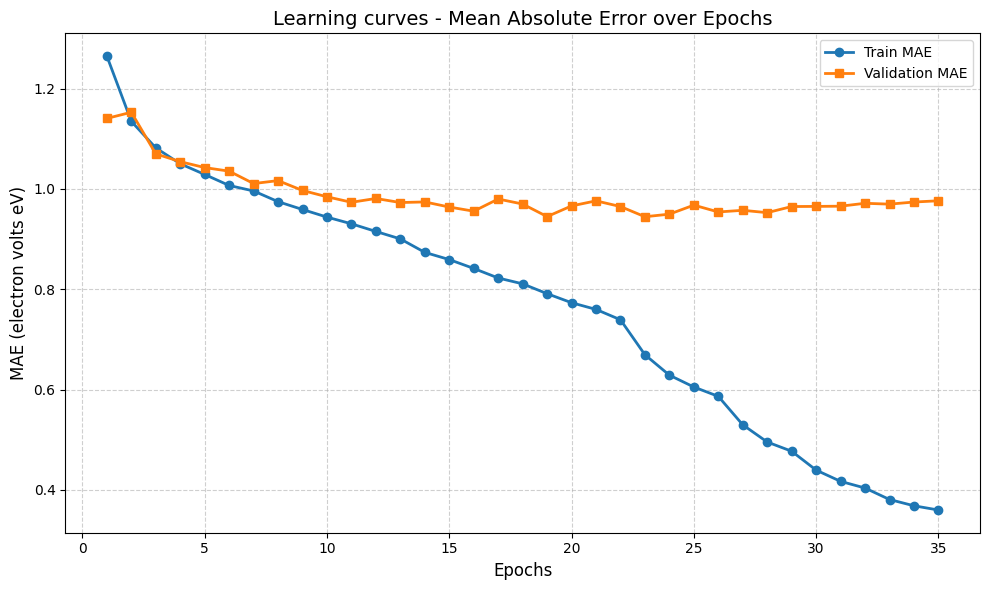

In [69]:
plot_training_curves(train_maes, val_maes)

### Training with 8k samples and validate with 2k samples

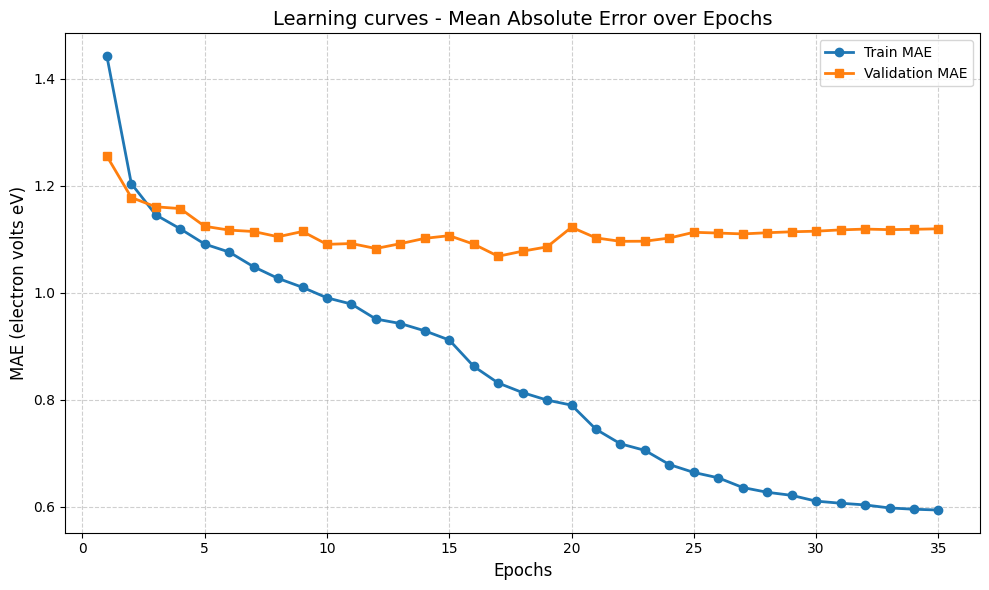

In [85]:
plot_training_curves(train_maes_8k, val_maes_8k)

### Training with 32k samples and validate with 8k samples

In [87]:
summarize_model_metrics(preds, targets)


--- Model Performance Summary (Validation) ---
Total Samples:      8000
Mean Absolute Error (MAE):  0.9765 eV
Root Mean Sq. Error (RMSE): 1.3873 eV
R-squared (R²):             0.6322
Median Absolute Error:      0.7038 eV
---------------------------------------------


- MAE of 0.9672 eV indicates that while the model has learned the general energy trends, it is still far from the "Chemical Accuracy" (0.02 eV). 

- RMSE (1.3754 eV) is higher than the MAE. This mathematical gap confirms that the model is making very large errors on specific "difficult" systems (likely rare metals or complex molecules), which pulls the average error up.

- R^2 of 0.59 suggests the model understands the "big picture" (e.g., larger systems have more energy), but it is struggling to capture the variance that comes from more complex structures.

### Training with 8k samples and validate with 2k samples

In [88]:
summarize_model_metrics(preds_8k, targets_8k)


--- Model Performance Summary (Validation) ---
Total Samples:      2000
Mean Absolute Error (MAE):  1.1193 eV
Root Mean Sq. Error (RMSE): 1.5508 eV
R-squared (R²):             0.5433
Median Absolute Error:      0.8151 eV
---------------------------------------------


### Training with 32k samples and validate with 8k samples

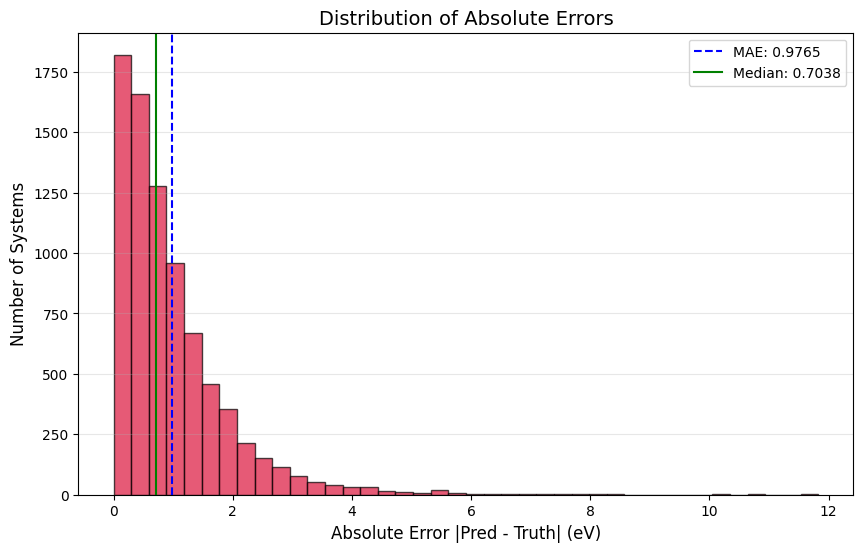

In [71]:
plot_error_distribution(preds, targets)

### Training with 8k samples and validate with 2k samples

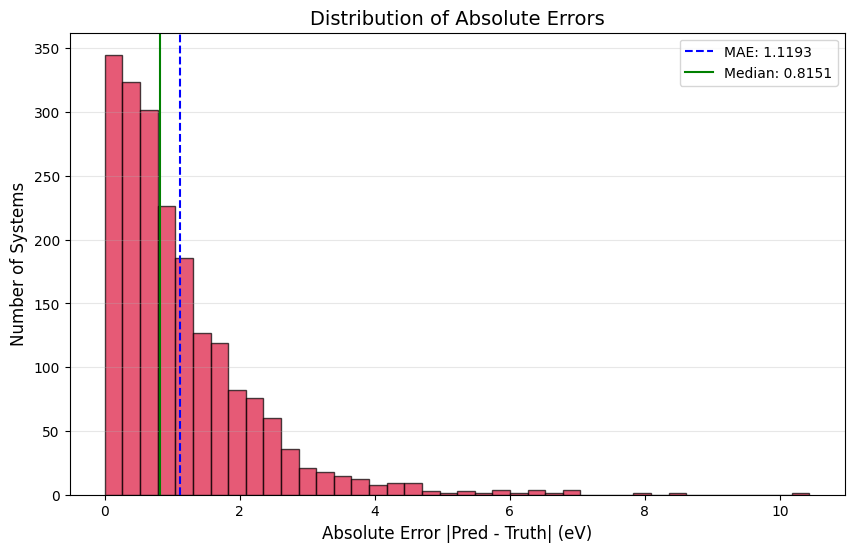

In [75]:
plot_error_distribution(preds_8k, targets_8k)

### Training with 32k samples and validate with 8k samples

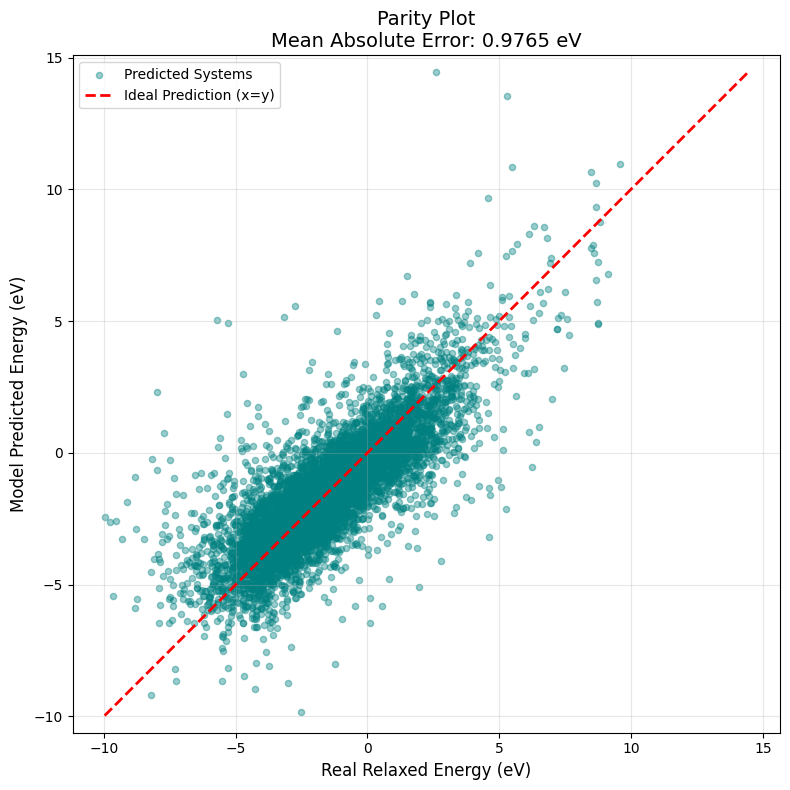

In [72]:
plot_parity_results(preds, targets)

### Training with 8k samples and validate with 2k samples

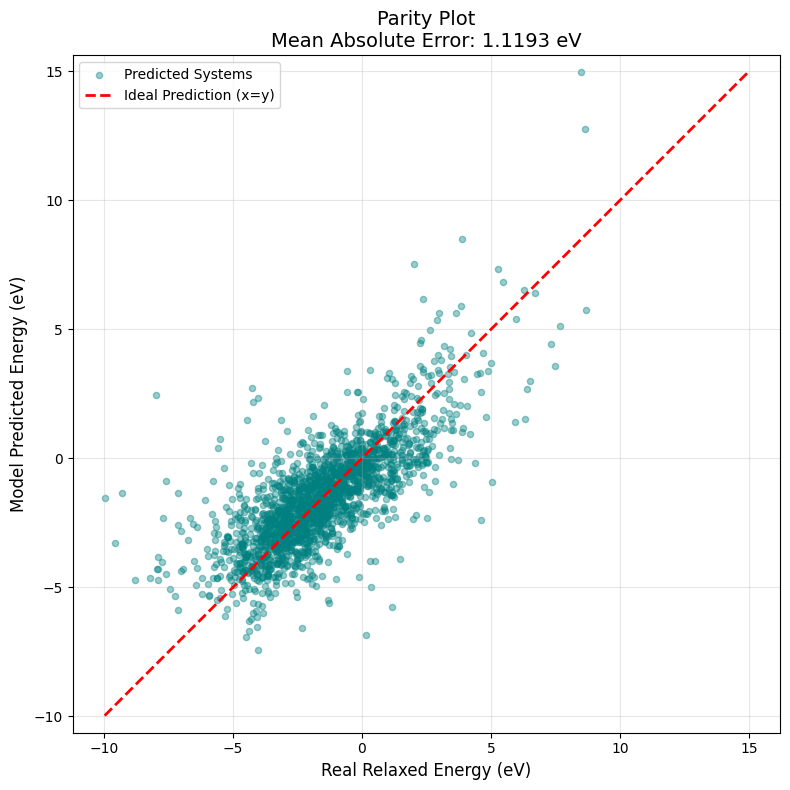

In [76]:
plot_parity_results(preds_8k, targets_8k)

***
## **Results** ● **PaiNN (T32 & V8)**

### Training with 32k samples and validate with 8k samples

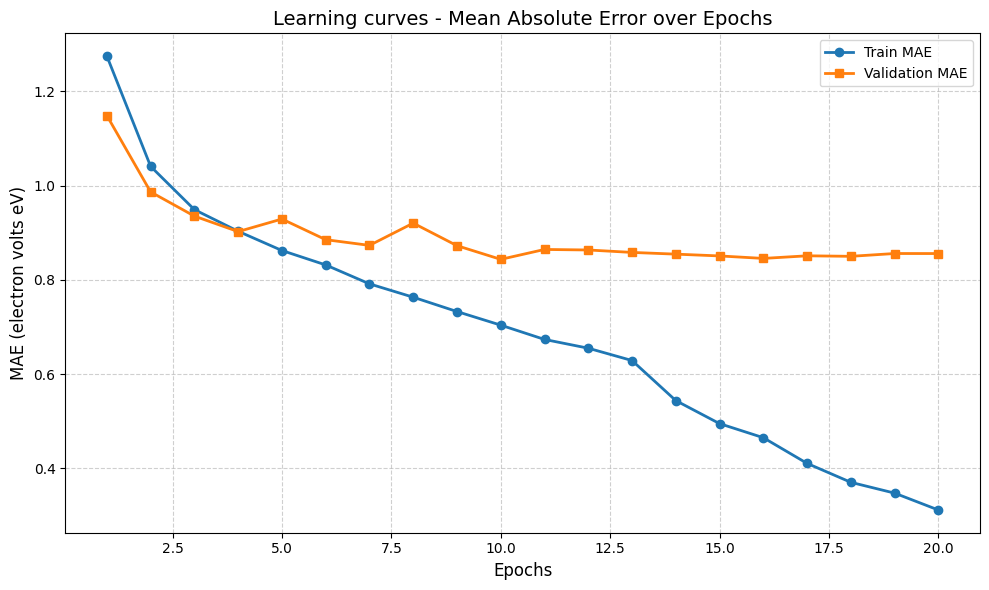

In [77]:
plot_training_curves(p_train_maes, p_val_maes)

### Training with 8k samples and validate with 2k samples

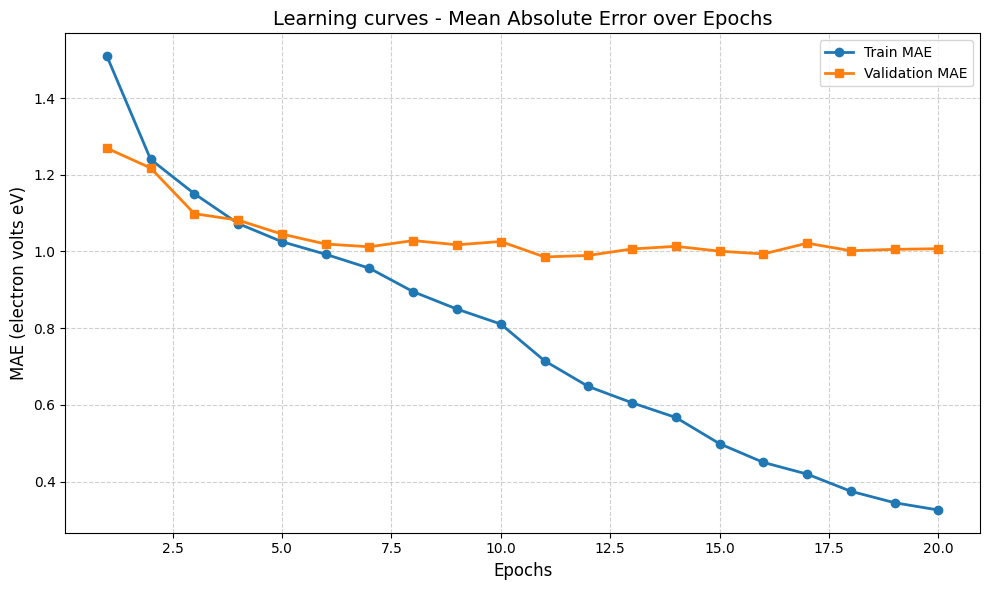

In [81]:
plot_training_curves(p_train_maes_8k, p_val_maes_8k)

### Training with 32k samples and validate with 8k samples

In [78]:
summarize_model_metrics(p_preds, p_targets)


--- Model Performance Summary (Validation) ---
Total Samples:      8000
Mean Absolute Error (MAE):  0.8558 eV
Root Mean Sq. Error (RMSE): 1.2395 eV
R-squared (R²):             0.7064
Median Absolute Error:      0.6028 eV
---------------------------------------------


### Training with 8k samples and validate with 2k samples

In [82]:
summarize_model_metrics(p_preds_8k, p_targets_8k)


--- Model Performance Summary (Validation) ---
Total Samples:      2000
Mean Absolute Error (MAE):  1.0072 eV
Root Mean Sq. Error (RMSE): 1.4442 eV
R-squared (R²):             0.6039
Median Absolute Error:      0.7301 eV
---------------------------------------------


### Training with 32k samples and validate with 8k samples

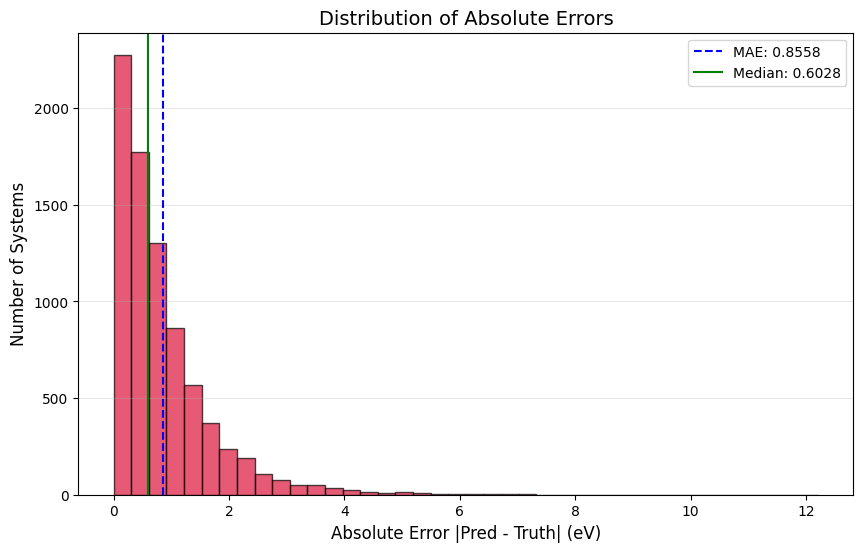

In [79]:
plot_error_distribution(p_preds, p_targets)

### Training with 8k samples and validate with 2k samples

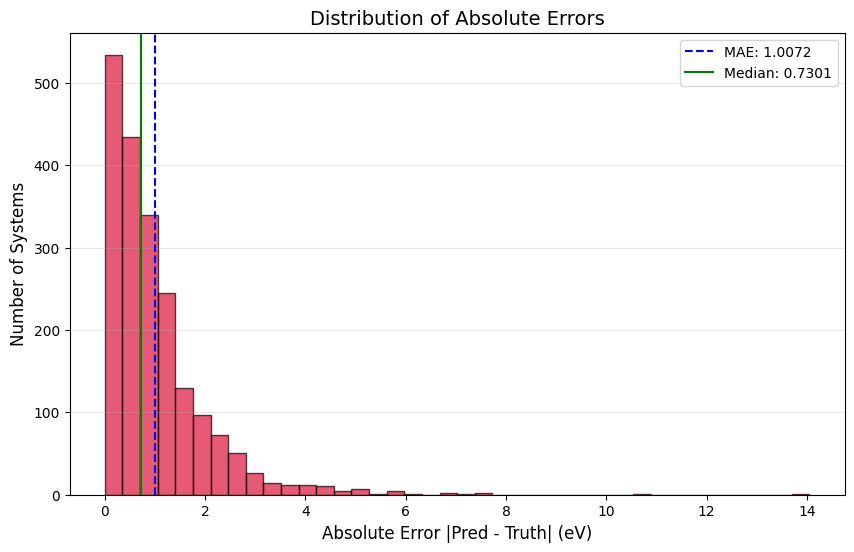

In [83]:
plot_error_distribution(p_preds_8k, p_targets_8k)

### Training with 32k samples and validate with 8k samples

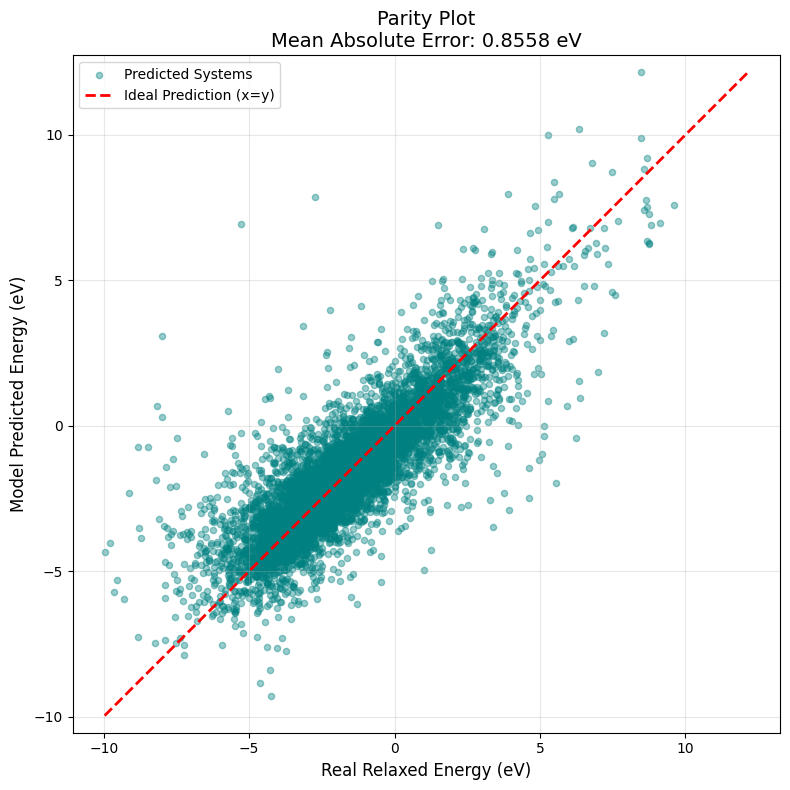

In [91]:
plot_parity_results(p_preds, p_targets)

### Training with 8k samples and validate with 2k samples

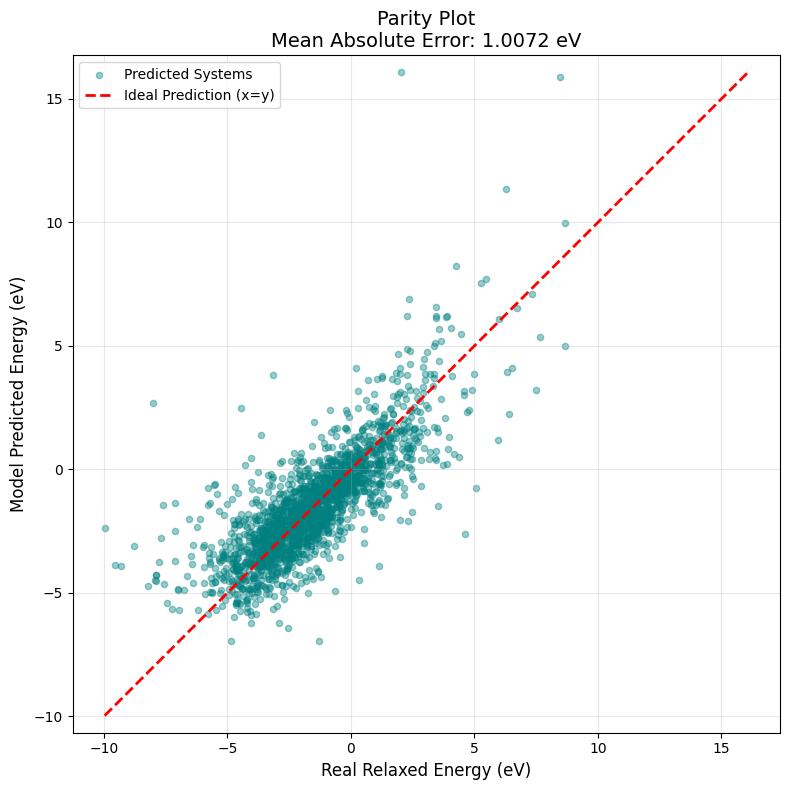

In [84]:
plot_parity_results(p_preds_8k, p_targets_8k)

***
# **Results interpretation**

## **Trainning with 32k samples VS 8k Samples**

## **SchNet VS PaiNN**

***
## **Conclusions**

In conclusion SchNet captures global stabilitation trends but it is not able to get better results because it is a "Distance-only" GNN. And thats is what we saw in the results. To be specific, the MAE is to high for our purpose. SchNet is based on Euclidean distances between atoms, but it doesn't understand angles, directions or interations between Atoms. Finally, in order to get better results is necessary to experiment with more complex and advance GNN that capture and bring better predictions.


#### **Source**

[1] An Introduction to Electrocatalyst Design using Machine Learning for Renewable Energy Storage<br>
    https://arxiv.org/abs/2010.09435

[2] SchNet: A continuous-filter convolutional neural network for modeling quantum interactions<br>
https://arxiv.org/abs/1706.08566

